In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv('Company Descriptions.csv')
company

,company_name,company_short_description,company_description
0,Codementor,Codementor is an online marketplace connecting...,Codementor provides live 1:1 help for software...
1,AgShift,AgShift is designing world's most advanced aut...,AgShift solution blends Deep Learning with Com...
2,Shipsi,Shipsi empowers any retailer with the ability ...,Shipsi empowers any retailer with the ability ...
3,OpenNews,"OpenNews helps a global network of developers,...","We're helping a global network of developers, ..."
4,Biobot Analytics,Biobot Analytics analyzes city sewage to estim...,Biobot Analytics analyzes sewage to estimate o...
...,...,...,...
19960,Powermat Technologies,Powermat Technologies develops wireless energy...,Powermat Technologies is a developer of wirele...
19961,Properly,The Ultimate Turnover Tool for Vacation Rental...,Properly is a visual checklist tool that lets ...
19962,Bid Ops,Bid Ops accelerates business partnerships betw...,NaN
19963,Tavolo,Tavolo is an online retailer and destination f...,Tavolo offers an online store that enables its...


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19965 entries, 0 to 19964
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   company_name               19965 non-null  object
 1   company_short_description  19965 non-null  object
 2   company_description        19237 non-null  object
dtypes: object(3)
memory usage: 468.1+ KB


In [4]:
# importing missing value in company_description with short decription
company.company_description = company.company_description.fillna(company.company_short_description)

In [5]:
company.isnull().sum()

company_name                 0
company_short_description    0
company_description          0
dtype: int64

In [6]:
company

,company_name,company_short_description,company_description
0,Codementor,Codementor is an online marketplace connecting...,Codementor provides live 1:1 help for software...
1,AgShift,AgShift is designing world's most advanced aut...,AgShift solution blends Deep Learning with Com...
2,Shipsi,Shipsi empowers any retailer with the ability ...,Shipsi empowers any retailer with the ability ...
3,OpenNews,"OpenNews helps a global network of developers,...","We're helping a global network of developers, ..."
4,Biobot Analytics,Biobot Analytics analyzes city sewage to estim...,Biobot Analytics analyzes sewage to estimate o...
...,...,...,...
19960,Powermat Technologies,Powermat Technologies develops wireless energy...,Powermat Technologies is a developer of wirele...
19961,Properly,The Ultimate Turnover Tool for Vacation Rental...,Properly is a visual checklist tool that lets ...
19962,Bid Ops,Bid Ops accelerates business partnerships betw...,Bid Ops accelerates business partnerships betw...
19963,Tavolo,Tavolo is an online retailer and destination f...,Tavolo offers an online store that enables its...


In [7]:
company = company.drop(['company_short_description'],axis=1)

In [8]:
company.head()

,company_name,company_description
0,Codementor,Codementor provides live 1:1 help for software...
1,AgShift,AgShift solution blends Deep Learning with Com...
2,Shipsi,Shipsi empowers any retailer with the ability ...
3,OpenNews,"We're helping a global network of developers, ..."
4,Biobot Analytics,Biobot Analytics analyzes sewage to estimate o...


# Text preprocessing

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punctuation(text):
    text_nopunctuation="".join([c for c in text if c not in string.punctuation])
    return text_nopunctuation

In [11]:
company.company_description = company.company_description.apply(remove_punctuation)

In [12]:
def remove_digit(text):
    result = ''.join([i for i in text if not i.isdigit()])
    return result

In [13]:
company.company_description = company.company_description.apply(remove_digit)

In [14]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
company.company_description = company.company_description.apply(lambda x: tokenization(x))

In [15]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
company.company_description = company.company_description.apply(lambda x:remove_stopwords(x))

In [16]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
company.company_description = company.company_description.apply(lambda x:lemmatizer(x))

In [17]:
company.company_description = company.company_description.apply(lambda x: ' '.join(x))

In [18]:
company.company_description[0]

'Codementor provides live  help for software development   e’re making it easy for developers to connect with experts via screen sharing video and chat  There are two ways to get help ondemand live  expert help and longterm dedicated mentorship \n\nBuild projects faster with ondemand help for topics including Ruby Python PHP JavaScript CSSHTML iOS Swift and more Codementor helps you overcome key challenges with timely advice and speeds up your development process'

In [19]:
data = company.company_description

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000, stop_words="english")
data_vectorized = vectorizer.fit_transform(company.company_description).toarray()

In [21]:
data_vectorized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
data_vectorized.shape

(19965, 10000)

In [23]:
wcss = []

for i in range(1,51):
    km = KMeans(n_clusters=i)
    km.fit_predict(data_vectorized)
    wcss.append(km.inertia_)

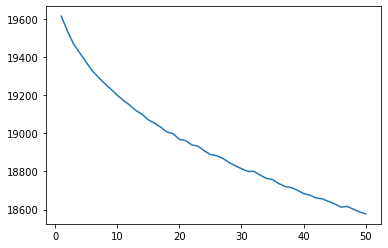

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,51),wcss)

### We have to check elbow point

In [29]:
km = KMeans(n_clusters=27)
y_mean = km.fit_predict(data_vectorized)

In [30]:
company['cluster_number'] = y_mean

In [32]:
company

,company_name,company_description,cluster_number
0,Codementor,Codementor provides live help for software de...,0
1,AgShift,AgShift solution blends Deep Learning with Com...,0
2,Shipsi,Shipsi empowers any retailer with the ability ...,0
3,OpenNews,ere helping a global network of developers jo...,0
4,Biobot Analytics,Biobot Analytics analyzes sewage to estimate o...,0
...,...,...,...
19960,Powermat Technologies,Powermat Technologies is a developer of wirele...,8
19961,Properly,Properly is a visual checklist tool that lets ...,0
19962,Bid Ops,Bid Ops accelerates business partnerships betw...,0
19963,Tavolo,Tavolo offers an online store that enables its...,8
